<a href="https://colab.research.google.com/github/hmorgancooper/Cancer_Classification/blob/master/NN_Cancer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network to predict whether a tumour is malign.
Data from UCI ML Breast Cancer Wisconsin (Diagnostic) datasets. Copy found: https://goo.gl/U2Uwz2


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Load and explore file

In [4]:
from google.colab import files
uploaded = files.upload()

Saving cancer_classification.csv to cancer_classification.csv


In [5]:
import io
df = pd.read_csv(io.BytesIO(uploaded['cancer_classification.csv']))

In [6]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

No null values

In [8]:
df.duplicated().sum()

0

No duplicates

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


Checking if data is balanced

In [ ]:
df['benign_0__mal_1'].value_counts()

1    357
0    212
Name: benign_0__mal_1, dtype: int64

More malignant than benign but fairly well balanced.
Next checking correlation of features.

In [ ]:
abs(df.corr()['benign_0__mal_1']).sort_values(ascending = False)

benign_0__mal_1            1.000000
worst concave points       0.793566
worst perimeter            0.782914
mean concave points        0.776614
worst radius               0.776454
mean perimeter             0.742636
worst area                 0.733825
mean radius                0.730029
mean area                  0.708984
mean concavity             0.696360
worst concavity            0.659610
mean compactness           0.596534
worst compactness          0.590998
radius error               0.567134
perimeter error            0.556141
area error                 0.548236
worst texture              0.456903
worst smoothness           0.421465
worst symmetry             0.416294
mean texture               0.415185
concave points error       0.408042
mean smoothness            0.358560
mean symmetry              0.330499
worst fractal dimension    0.323872
compactness error          0.292999
concavity error            0.253730
fractal dimension error    0.077972
smoothness error           0

Many of the features have strong correlation with the target column so should be able to get decent predictions from the data. 

# Creating the model

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df.drop('benign_0__mal_1', axis = 1).values
y = df['benign_0__mal_1'].values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [15]:
X_train

array([[1.301e+01, 2.222e+01, 8.201e+01, ..., 9.259e-03, 2.295e-01,
        5.843e-02],
       [1.469e+01, 1.398e+01, 9.822e+01, ..., 1.108e-01, 2.827e-01,
        9.208e-02],
       [1.471e+01, 2.159e+01, 9.555e+01, ..., 1.834e-01, 3.698e-01,
        1.094e-01],
       ...,
       [1.607e+01, 1.965e+01, 1.041e+02, ..., 1.520e-01, 2.650e-01,
        6.387e-02],
       [1.877e+01, 2.143e+01, 1.229e+02, ..., 2.048e-01, 3.679e-01,
        9.870e-02],
       [1.371e+01, 1.868e+01, 8.873e+01, ..., 1.284e-01, 2.849e-01,
        9.031e-02]])

In [16]:
X_train = scaler.fit_transform(X_train)

In [17]:
X_train

array([[0.29497529, 0.42306392, 0.26706729, ..., 0.03181787, 0.14373028,
        0.02114387],
       [0.37717109, 0.14440311, 0.3803368 , ..., 0.38075601, 0.24861987,
        0.24210388],
       [0.37814962, 0.40175854, 0.36167983, ..., 0.63024055, 0.420347  ,
        0.35583426],
       ...,
       [0.44468907, 0.3361515 , 0.42142408, ..., 0.52233677, 0.2137224 ,
        0.05686519],
       [0.57678947, 0.39634765, 0.55279156, ..., 0.70378007, 0.41660095,
        0.28557358],
       [0.32922354, 0.30334799, 0.31402418, ..., 0.44123711, 0.25295741,
        0.23048132]])

In [18]:
X_test = scaler.transform(X_test)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [20]:
X_train.shape

(398, 30)

In [21]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
#Binary classification so use sigmoid fn and binary_crossentropy
model.add(Dense(1, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [22]:
model.fit(x = X_train, y = y_train, epochs = 600, validation_data=(X_test, y_test))

Epoch 1/600
13/13 [==============================] - 0s 11ms/step - loss: 0.6650 - val_loss: 0.6461
Epoch 2/600
13/13 [==============================] - 0s 3ms/step - loss: 0.6225 - val_loss: 0.6089
Epoch 3/600
13/13 [==============================] - 0s 2ms/step - loss: 0.5826 - val_loss: 0.5690
Epoch 4/600
13/13 [==============================] - 0s 3ms/step - loss: 0.5385 - val_loss: 0.5255
Epoch 5/600
13/13 [==============================] - 0s 3ms/step - loss: 0.4938 - val_loss: 0.4797
Epoch 6/600
13/13 [==============================] - 0s 3ms/step - loss: 0.4447 - val_loss: 0.4350
Epoch 7/600
13/13 [==============================] - 0s 3ms/step - loss: 0.3994 - val_loss: 0.3915
Epoch 8/600
13/13 [==============================] - 0s 3ms/step - loss: 0.3580 - val_loss: 0.3525
Epoch 9/600
13/13 [==============================] - 0s 3ms/step - loss: 0.3222 - val_loss: 0.3217
Epoch 10/600
13/13 [==============================] - 0s 3ms/step - loss: 0.2927 - val_loss: 0.2936
Epoch 11

In [23]:
losses = pd.DataFrame(model.history.history)

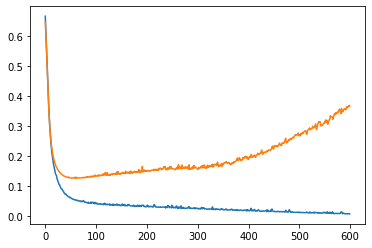

In [24]:
plt.plot(losses)

Model is overfitting, adding early stopping and drop out features.

In [ ]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
#Binary classification so use sigmoid fn and binary_crossentropy
model.add(Dense(1, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode = 'min', verbose = 1, patience=25)

In [ ]:
model.fit(x = X_train, y = y_train, epochs = 600, validation_data=(X_test, y_test),
          callbacks = [early_stop])

Epoch 1/600
13/13 [==============================] - 0s 10ms/step - loss: 0.6991 - val_loss: 0.6820
Epoch 2/600
13/13 [==============================] - 0s 3ms/step - loss: 0.6560 - val_loss: 0.6447
Epoch 3/600
13/13 [==============================] - 0s 3ms/step - loss: 0.6165 - val_loss: 0.6078
Epoch 4/600
13/13 [==============================] - 0s 3ms/step - loss: 0.5786 - val_loss: 0.5706
Epoch 5/600
13/13 [==============================] - 0s 3ms/step - loss: 0.5369 - val_loss: 0.5296
Epoch 6/600
13/13 [==============================] - 0s 3ms/step - loss: 0.4948 - val_loss: 0.4866
Epoch 7/600
13/13 [==============================] - 0s 3ms/step - loss: 0.4494 - val_loss: 0.4456
Epoch 8/600
13/13 [==============================] - 0s 3ms/step - loss: 0.4098 - val_loss: 0.4062
Epoch 9/600
13/13 [==============================] - 0s 3ms/step - loss: 0.3725 - val_loss: 0.3705
Epoch 10/600
13/13 [==============================] - 0s 3ms/step - loss: 0.3376 - val_loss: 0.3404
Epoch 11

In [ ]:
model_loss = pd.DataFrame(model.history.history)

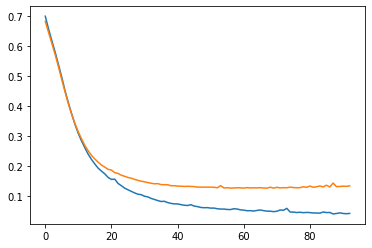

In [ ]:
plt.plot(model_loss)

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))
#Binary classification so use sigmoid fn and binary_crossentropy
model.add(Dense(1, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [ ]:
model.fit(x = X_train, y = y_train, epochs = 600, validation_data=(X_test, y_test),
          callbacks = [early_stop])

Epoch 1/600
13/13 [==============================] - 0s 10ms/step - loss: 0.6869 - val_loss: 0.6668
Epoch 2/600
13/13 [==============================] - 0s 3ms/step - loss: 0.6601 - val_loss: 0.6517
Epoch 3/600
13/13 [==============================] - 0s 3ms/step - loss: 0.6480 - val_loss: 0.6358
Epoch 4/600
13/13 [==============================] - 0s 3ms/step - loss: 0.6339 - val_loss: 0.6218
Epoch 5/600
13/13 [==============================] - 0s 3ms/step - loss: 0.6228 - val_loss: 0.6047
Epoch 6/600
13/13 [==============================] - 0s 3ms/step - loss: 0.6097 - val_loss: 0.5881
Epoch 7/600
13/13 [==============================] - 0s 3ms/step - loss: 0.5970 - val_loss: 0.5716
Epoch 8/600
13/13 [==============================] - 0s 3ms/step - loss: 0.5888 - val_loss: 0.5532
Epoch 9/600
13/13 [==============================] - 0s 3ms/step - loss: 0.5766 - val_loss: 0.5356
Epoch 10/600
13/13 [==============================] - 0s 3ms/step - loss: 0.5764 - val_loss: 0.5191
Epoch 11

In [ ]:
model_loss = pd.DataFrame(model.history.history)

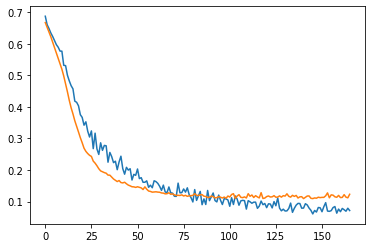

In [ ]:
plt.plot(model_loss)

In [ ]:
predictions = model.predict_classes(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        66
           1       0.98      0.98      0.98       105

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [ ]:
print(confusion_matrix(y_test, predictions))

[[ 64   2]
 [  2 103]]
